In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
test_folder = '/content/drive/MyDrive/final _dataset/test'
class_names = os.listdir(test_folder)
num_images_per_class = 3

plt.figure(figsize=(10, 10))

for class_name in class_names:
    class_folder = os.path.join(test_folder, class_name)
    image_files = os.listdir(class_folder)[:num_images_per_class]

    for image_file in image_files:
        image_path = os.path.join(class_folder, image_file)
        image = mpimg.imread(image_path)

        plt.subplot(len(class_names), num_images_per_class, class_names.index(class_name) * num_images_per_class + image_files.index(image_file) + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


FileNotFoundError: ignored

In [ ]:
main_folder = '/content/drive/MyDrive/final _dataset'

# List of subfolders (train and test)
subfolders = ['train', 'test']

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    class_names = os.listdir(subfolder_path)

    print(f"Number of images in {subfolder} folder:")

    for class_name in class_names:
        class_folder = os.path.join(subfolder_path, class_name)
        num_images = len(os.listdir(class_folder))
        print(f"Class {class_name}: {num_images} images")

    print("-" * 20)

Number of images in train folder:
Class MCI: 797 images
Class AD: 373 images
Class CN: 459 images
--------------------
Number of images in test folder:
Class CN: 119 images
Class AD: 87 images
Class MCI: 197 images
--------------------


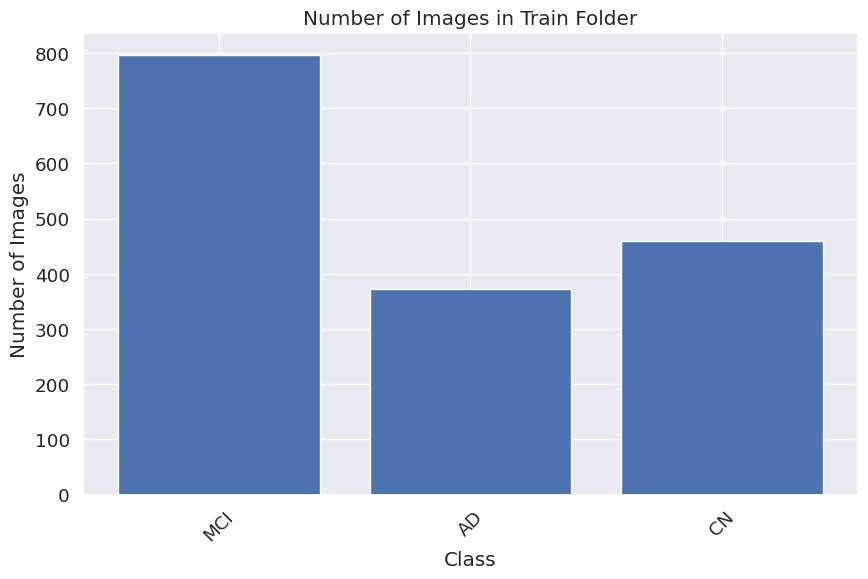

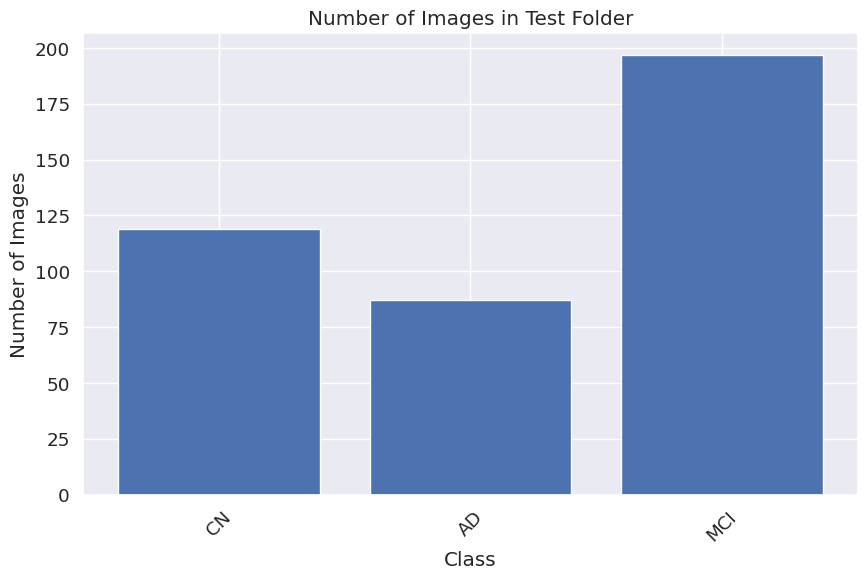

In [ ]:
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    class_names = os.listdir(subfolder_path)
    class_counts = []

    for class_name in class_names:
        class_folder = os.path.join(subfolder_path, class_name)
        num_images = len(os.listdir(class_folder))
        class_counts.append(num_images)

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, class_counts)
    plt.title(f"Number of Images in {subfolder.capitalize()} Folder")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
!pip install pillow

In [ ]:
from PIL import *
Image

<module 'PIL.Image' from '/usr/local/lib/python3.10/dist-packages/PIL/Image.py'>

In [ ]:
import PIL.Image
image_path = '/content/drive/MyDrive/final _dataset/test/AD/AD_106.png'

# Open the image and get its size
image = Image.open(image_path)

image_size = image.size

print(f"Image: {image_path} | Size: {image_size[0]} x {image_size[1]}")

Image: /content/drive/MyDrive/final _dataset/test/AD/AD_106.png | Size: 256 x 256


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Path to the train dataset folder
train_folder ='/content/drive/MyDrive/final _dataset/train'

# List of class names
class_names = os.listdir(train_folder)

# Image dimensions
image_width, image_height = 128, 128

# Load and preprocess the images
data = []
labels = []

for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(train_folder, class_name)
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)
        image = Image.open(image_path).convert("L")  # Convert to grayscale
        image = image.resize((image_width, image_height))
        image = np.array(image) / 255.0  # Normalize pixel values
        data.append(image)
        labels.append(class_index)

data = np.array(data)
labels = np.array(labels)

In [ ]:
print(len(class_names))

3


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val))


Epoch 1/1000
41/41 [==============================] - 4s 33ms/step - loss: 1.0713 - accuracy: 0.4689 - val_loss: 1.0533 - val_accuracy: 0.5552
Epoch 2/1000
41/41 [==============================] - 1s 17ms/step - loss: 1.0728 - accuracy: 0.4751 - val_loss: 1.0299 - val_accuracy: 0.5552
Epoch 3/1000
41/41 [==============================] - 1s 19ms/step - loss: 1.0579 - accuracy: 0.4728 - val_loss: 0.9865 - val_accuracy: 0.5552
Epoch 4/1000
41/41 [==============================] - 1s 25ms/step - loss: 1.0521 - accuracy: 0.4735 - val_loss: 0.9682 - val_accuracy: 0.5552
Epoch 5/1000
41/41 [==============================] - 1s 20ms/step - loss: 1.0284 - accuracy: 0.4873 - val_loss: 0.9843 - val_accuracy: 0.5859
Epoch 6/1000
41/41 [==============================] - 1s 21ms/step - loss: 0.9858 - accuracy: 0.5127 - val_loss: 0.9119 - val_accuracy: 0.5951
Epoch 7/1000
41/41 [==============================] - 1s 17ms/step - loss: 0.9128 - accuracy: 0.5802 - val_loss: 0.8504 - val_accuracy: 0.6043

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()


NameError: ignored

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [ ]:
# Path to the test dataset folder
test_folder = '/content/drive/MyDrive/final _dataset/test'

# Load and preprocess the test images
test_data = []
test_labels = []

for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(test_folder, class_name)
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)
        image = Image.open(image_path).convert("L")  # Convert to grayscale
        image = image.resize((image_width, image_height))
        image = np.array(image) / 255.0  # Normalize pixel values
        test_data.append(image)
        test_labels.append(class_index)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)

print(f"Test accuracy: {test_accuracy:.4f}")


13/13 - 0s - loss: 2.1257 - accuracy: 0.9057 - 100ms/epoch - 8ms/step
Test accuracy: 0.9057


In [ ]:
print(f"Test accuracy percentage: {test_accuracy*100}")

Test accuracy percentage: 90.57071805000305


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


1/1 [==============================] - 0s 29ms/step


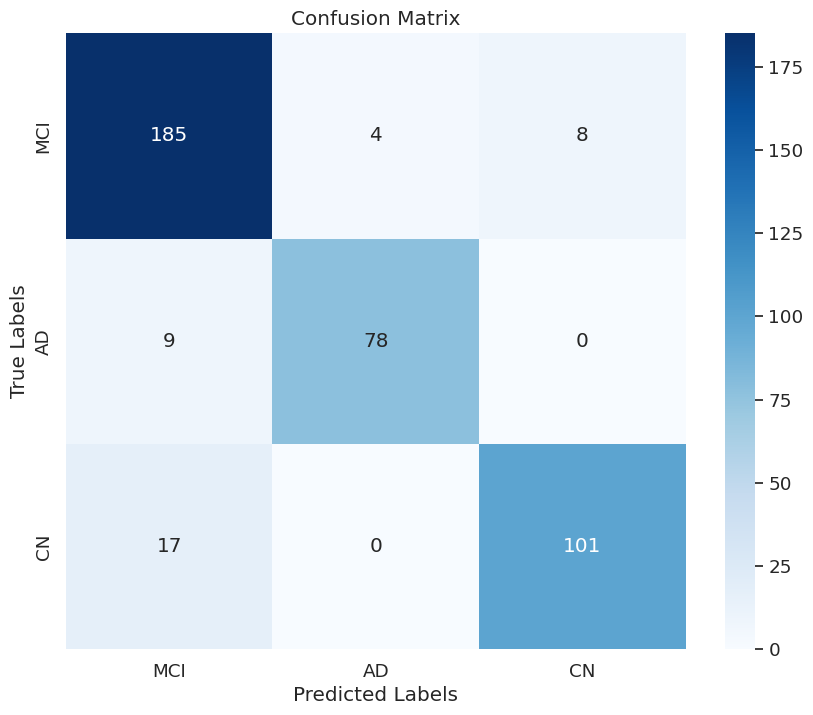

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code for generating the confusion matrix
batch_size = 3
num_batches = len(test_data) // batch_size

all_true_labels = []
all_predicted_labels = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_data = test_data[start_idx:end_idx]
    batch_labels = test_labels[start_idx:end_idx]

    batch_predictions = model.predict(batch_data)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)

    all_true_labels.extend(batch_labels)
    all_predicted_labels.extend(batch_predicted_labels)

confusion_mat = confusion_matrix(all_true_labels, all_predicted_labels)

# Plot and save the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix as an image
plt.show()
